In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from gen_ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

In [2]:
%matplotlib auto

Using matplotlib backend: <object object at 0x000002D4F9182590>


In [3]:
%matplotlib inline

In [4]:
x = np.arange(1, 5, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.zeros(shape=(len(dataX)))

for sample in range(len(dataX)):
    data_labels[sample] = round(dataX[sample]) * round(dataY[sample])

In [5]:
mf1 = [[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5], [3, 0.25, 0.5, 0.5], [4, 0.25, 0.5, 0.5], [5, 0.25, 0.5, 0.5]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["1","2"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["1","2"])

Parametry początkowe:
Przesłanki:  [[[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5], [3, 0.25, 0.5, 0.5], [4, 0.25, 0.5, 0.5], [5, 0.25, 0.5, 0.5]], [[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5], [3, 0.25, 0.5, 0.5], [4, 0.25, 0.5, 0.5], [5, 0.25, 0.5, 0.5]]] 
Konkluzje:  [[0.9864559  0.51111786 0.91492236]
 [0.92955    0.41425886 0.41994187]
 [0.85311374 0.6636092  0.92608057]
 [0.61470223 0.88301755 0.63222817]
 [0.26412041 0.81466749 0.47447708]
 [0.60898192 0.46874491 0.94800038]
 [0.41550023 0.22460379 0.00131777]
 [0.05900287 0.81007741 0.15264491]
 [0.20131225 0.04473048 0.78724517]
 [0.31219632 0.53502946 0.11881694]
 [0.69036098 0.44913077 0.3296023 ]
 [0.50183102 0.15391822 0.00932321]
 [0.12301076 0.64785466 0.01669186]
 [0.09797338 0.29395741 0.00991704]
 [0.36783784 0.59040751 0.27503541]
 [0.66135653 0.01050658 0.01767705]
 [0.88194636 0.48087142 0.84978698]
 [0.07096008 0.52307002 0.83436806]
 [0.59645337 0.39609756 0.29060242]
 [0.61752007 0.04190921 0.90126888]
 [0.22458547 0.77

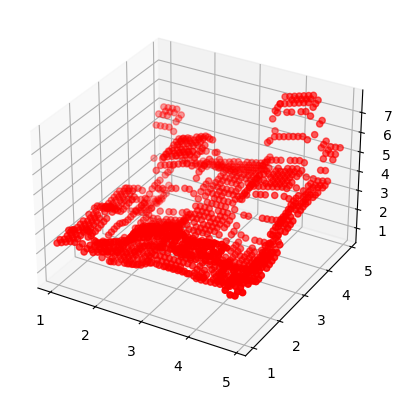

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

Current lowest error: 665.1580: 100%|██████████| 200/200 [02:38<00:00,  1.26it/s] 

Optymalizacja zakończona!
z blędem:   665.1579780324971
Liczba it:  200
TIME elapsed:  164.41407322883606


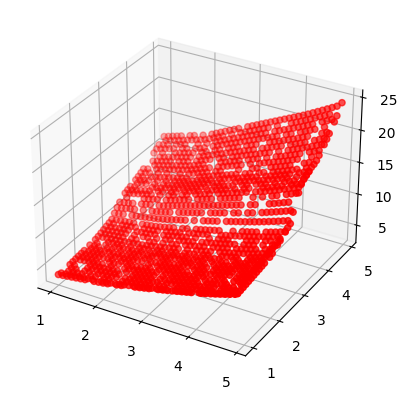

In [14]:
start = time.time()
fis.train(True, True, False, True, n_iter=200)
end = time.time()
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

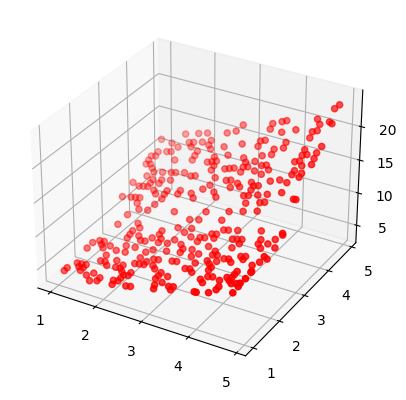

In [15]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

# y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
# y_pred = list(map(round,y_pred.flatten()))
# print(confusion_matrix(y_test, y_pred))

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [9]:
mf1 = {"1": [1, 0.25, 0.5, 0.5],
       "2": [2, 0.25, 0.5, 0.5],
       "3": [3, 0.25, 0.5, 0.5],
       "4": [4, 0.25, 0.5, 0.5],
       "5": [5, 0.25, 0.5, 0.5],
}

times = []
confusion_matrices = []
results = []

for test in range(2, 6):
    x = np.arange(1, test, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
    dataXY = np.column_stack((dataX,dataY))

    data_labels = np.zeros(shape=(len(dataX)))

    for sample in range(len(dataX)):
        data_labels[sample] = round(dataX[sample]) * round(dataY[sample])

    varX = FuzzyInputVariable_List_Trapezoids(list(mf1.values())[:test], "XAxis", list(mf1.keys())[:test])
    varY = FuzzyInputVariable_List_Trapezoids(list(mf1.values())[:test], "XAxis", list(mf1.keys())[:test])

    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)
    fis = ANFIS([varX, varY], X_train.T, y_train)

    start = time.time()
    result = fis.train(True, True, False, True, n_iter=1000)
    end = time.time()

    fis.training_data = X_test.T
    fis.expected_labels = y_test
    y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
    y_pred = list(map(round,y_pred.flatten()))

    times.append(end - start)
    results.append(result)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    # print(confusion_matrix(y_test, y_pred))

Current lowest error: 27.3148: 100%|██████████| 1000/1000 [01:31<00:00, 10.92it/s]


Optymalizacja zakończona!
z blędem:   27.31479466431307
Liczba it:  1000


  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\cubix\Desktop\MSI\lab03\gen_ANFIS.py:82: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum
Current lowest error: 219.8253: 100%|██████████| 1000/1000 [03:13<00:00,  5.17it/s]


Optymalizacja zakończona!
z blędem:   219.82529186711014
Liczba it:  1000


Current lowest error: 1145.1262:  18%|█▊        | 177/1000 [01:10<05:16,  2.60it/s]C:\Users\cubix\Desktop\MSI\lab03\gen_ANFIS.py:82: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum
Current lowest error: 667.8505: 100%|██████████| 1000/1000 [06:44<00:00,  2.47it/s]


Optymalizacja zakończona!
z blędem:   667.8505208428799
Liczba it:  1000


Current lowest error: 1535.3601: 100%|██████████| 1000/1000 [13:52<00:00,  1.20it/s]

Optymalizacja zakończona!
z blędem:   1535.360072786617
Liczba it:  1000


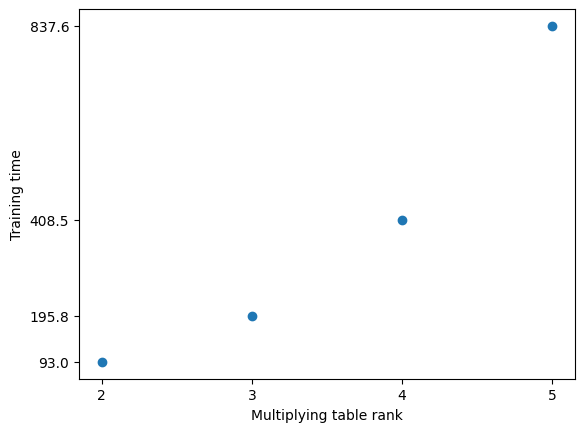

In [10]:
plt.scatter([2, 3, 4, 5], times)
plt.xlabel('Multiplying table rank')
plt.xticks([2,3,4,5])
plt.ylabel('Training time')
plt.yticks(times)
plt.show()

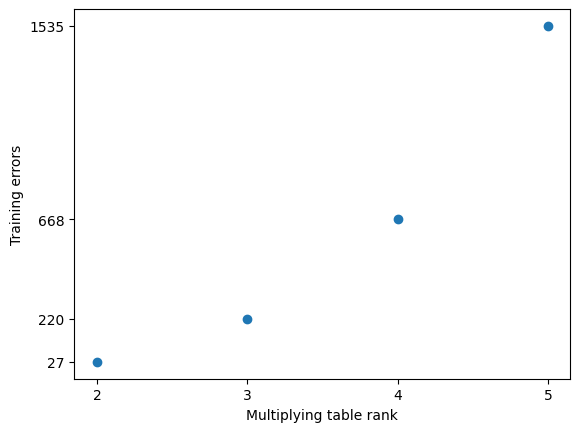

In [11]:
plt.scatter([2, 3, 4, 5], results)
plt.xlabel('Multiplying table rank')
plt.xticks([2, 3, 4, 5])
plt.ylabel('Training errors')
plt.yticks(results)
plt.show()